In [1]:
library(knitr)
library(dplyr)
library(Seurat)
library(reticulate)
library(scales)
library(DT)
set.seed(1234)
options(repr.plot.width=14, repr.plot.height=10)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘DT’


The following object is masked from ‘package:Seurat’:

    JS




In [2]:
arg01 <- "tenx" #library name: tenx, dropseq, mca
arg02 <- "filtered_feature_bc_matrix/" #10X directory, dropseq / mca count matrix
arg03 <- "2_intact" #project name
arg04 <- "2_intact.rds"  #output file name for saveRDS function

In [3]:
switch(arg01,
    "tenx" = tmp.data <- Read10X(data.dir = arg02),
    "dropseq" = tmp.data <- read.table(arg02, sep = "\t", header=T, row.names=1),
    "mca" = tmp.data <- read.table(arg02, sep = "\t", header=T, row.names=1),
    print("You have chosen undefined library parameter"))
tmp <- CreateSeuratObject(counts = tmp.data, project = arg03, min.cells = 3)
print(tmp)

An object of class Seurat 
20721 features across 6640 samples within 1 assay 
Active assay: RNA (20721 features)


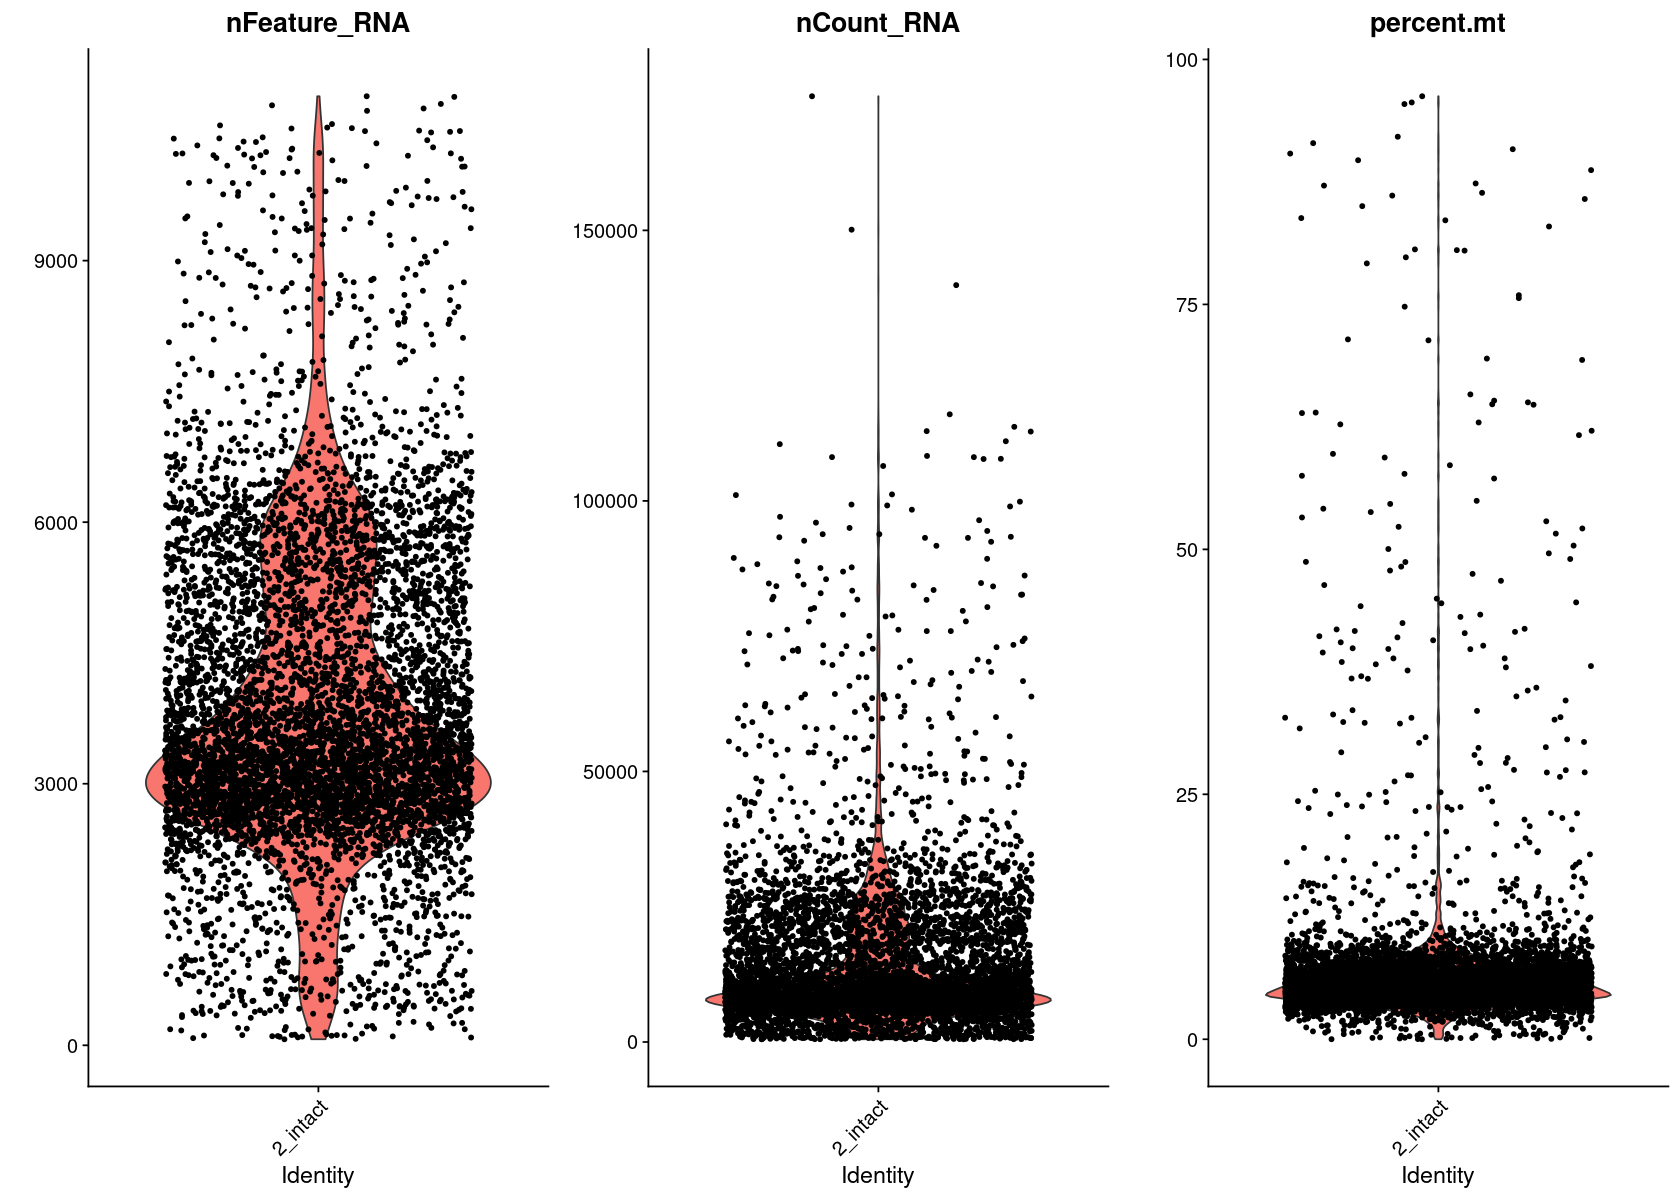

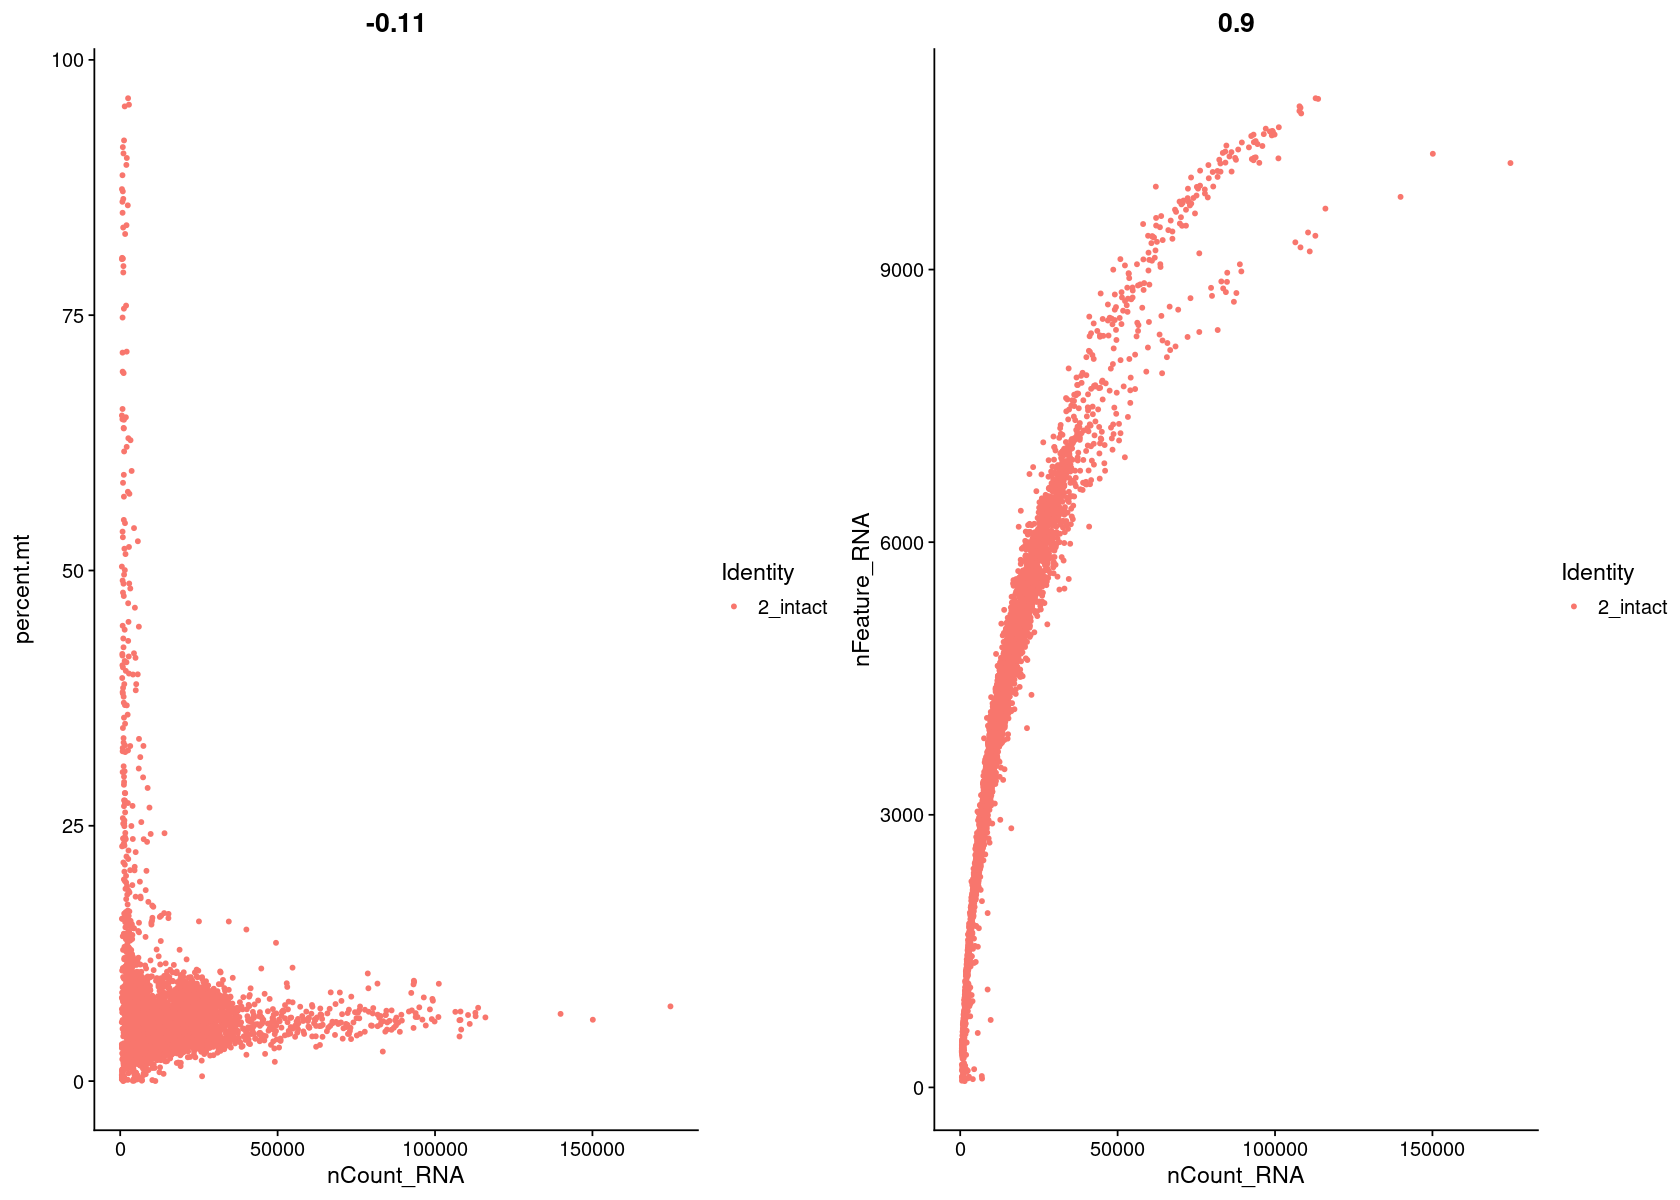

In [4]:
tmp[["percent.mt"]] <- PercentageFeatureSet(tmp, pattern="^mt-")
VlnPlot(tmp, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

plot1 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

In [5]:
arg05 <- 100 #nFeature_RNA_min
arg06 <- 10000 #nFeature_RNA_max
arg07 <- 10 #nCount_RNA_min
arg08 <- 100000 #nCount_RNA_max
arg09 <- 50 #percent.mt_max

An object of class Seurat 
20721 features across 6523 samples within 1 assay 
Active assay: RNA (20721 features)


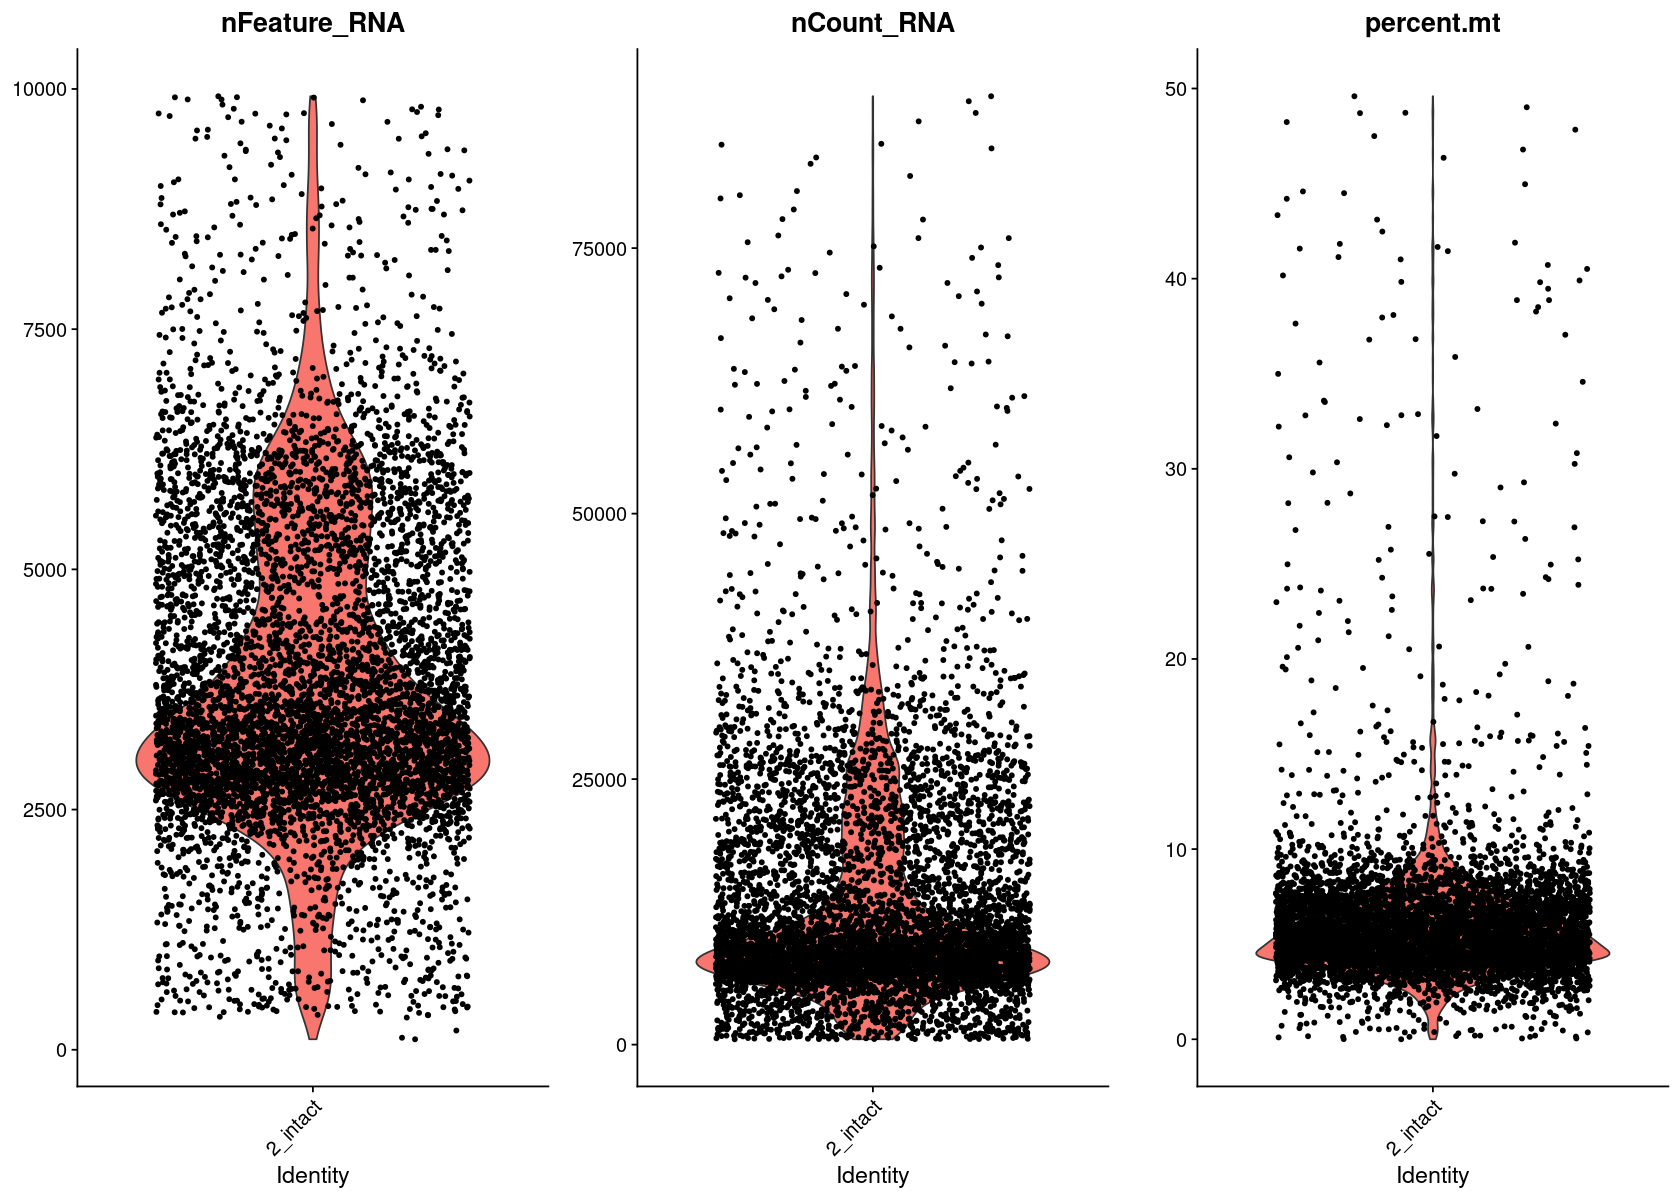

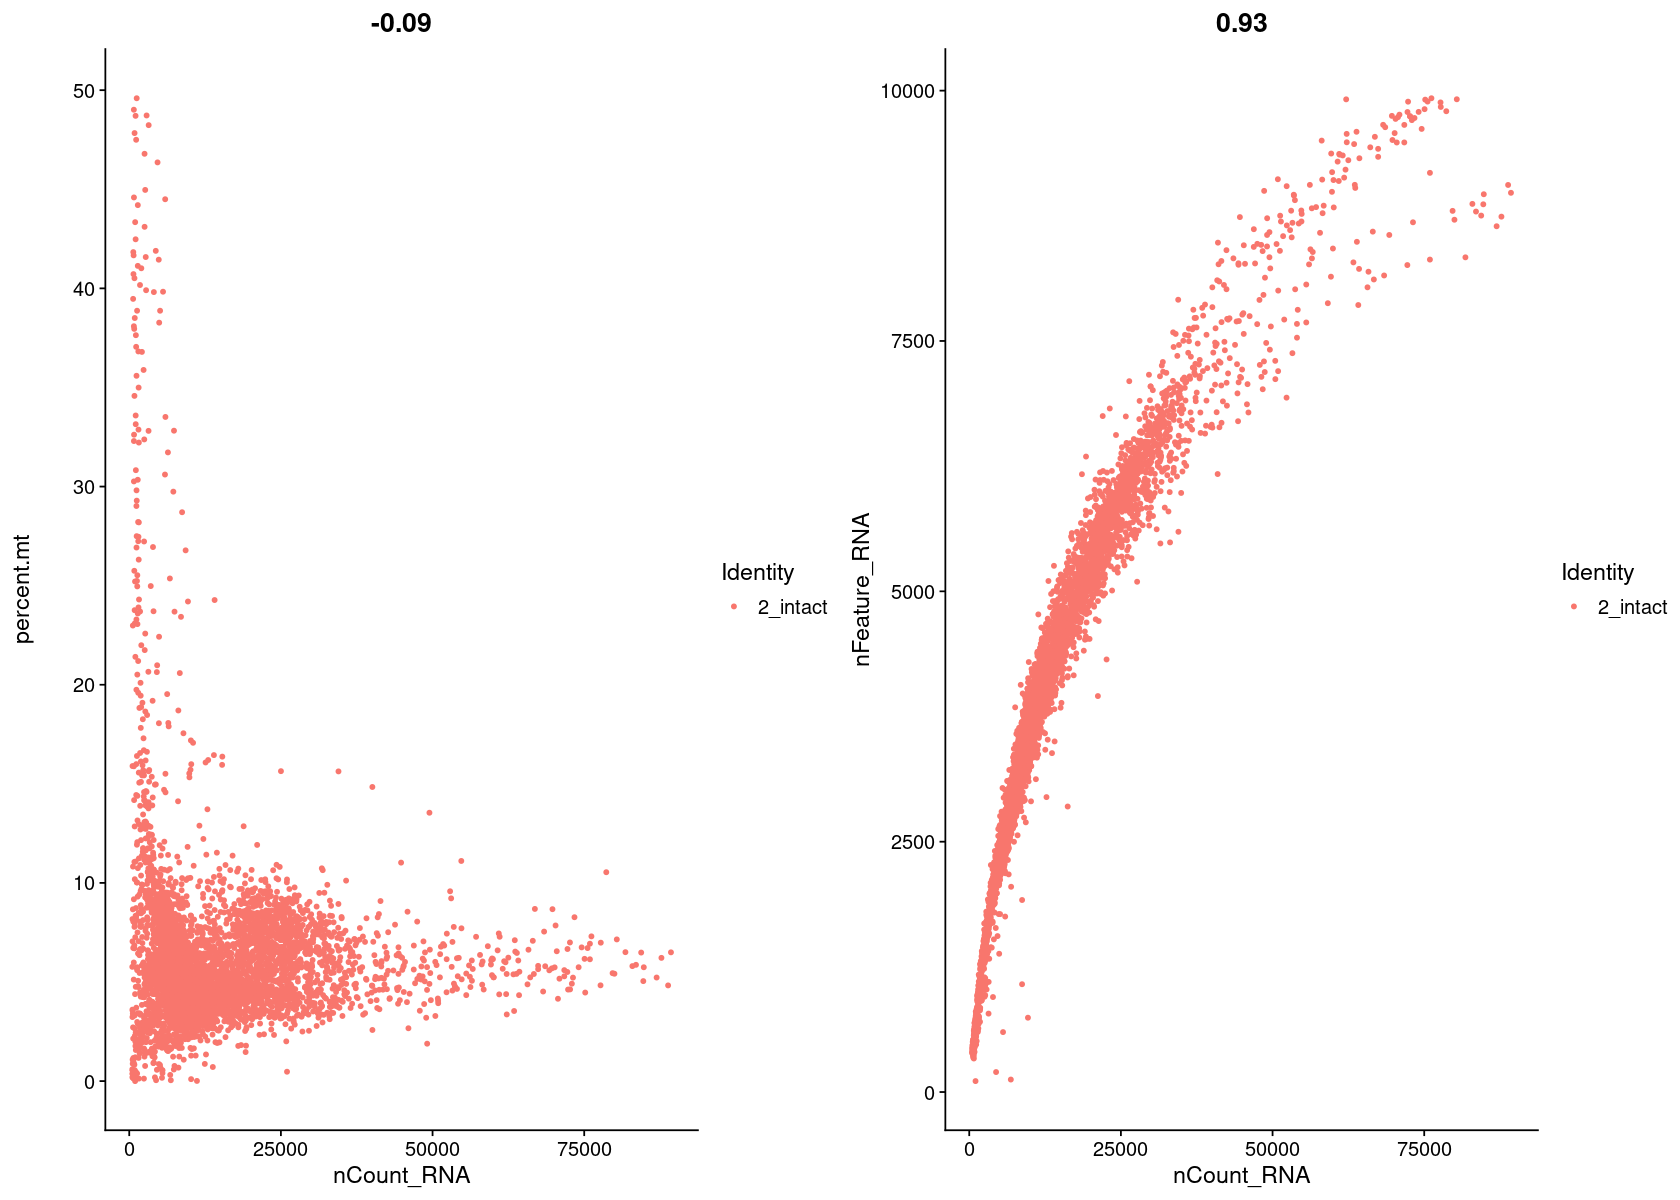

In [6]:
tmp <- subset(tmp, subset = nFeature_RNA > arg05 & nFeature_RNA < arg06 & nCount_RNA > arg07 & nCount_RNA < arg08 & percent.mt < arg09)
print(tmp)
VlnPlot(tmp, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

plot1 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”
When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


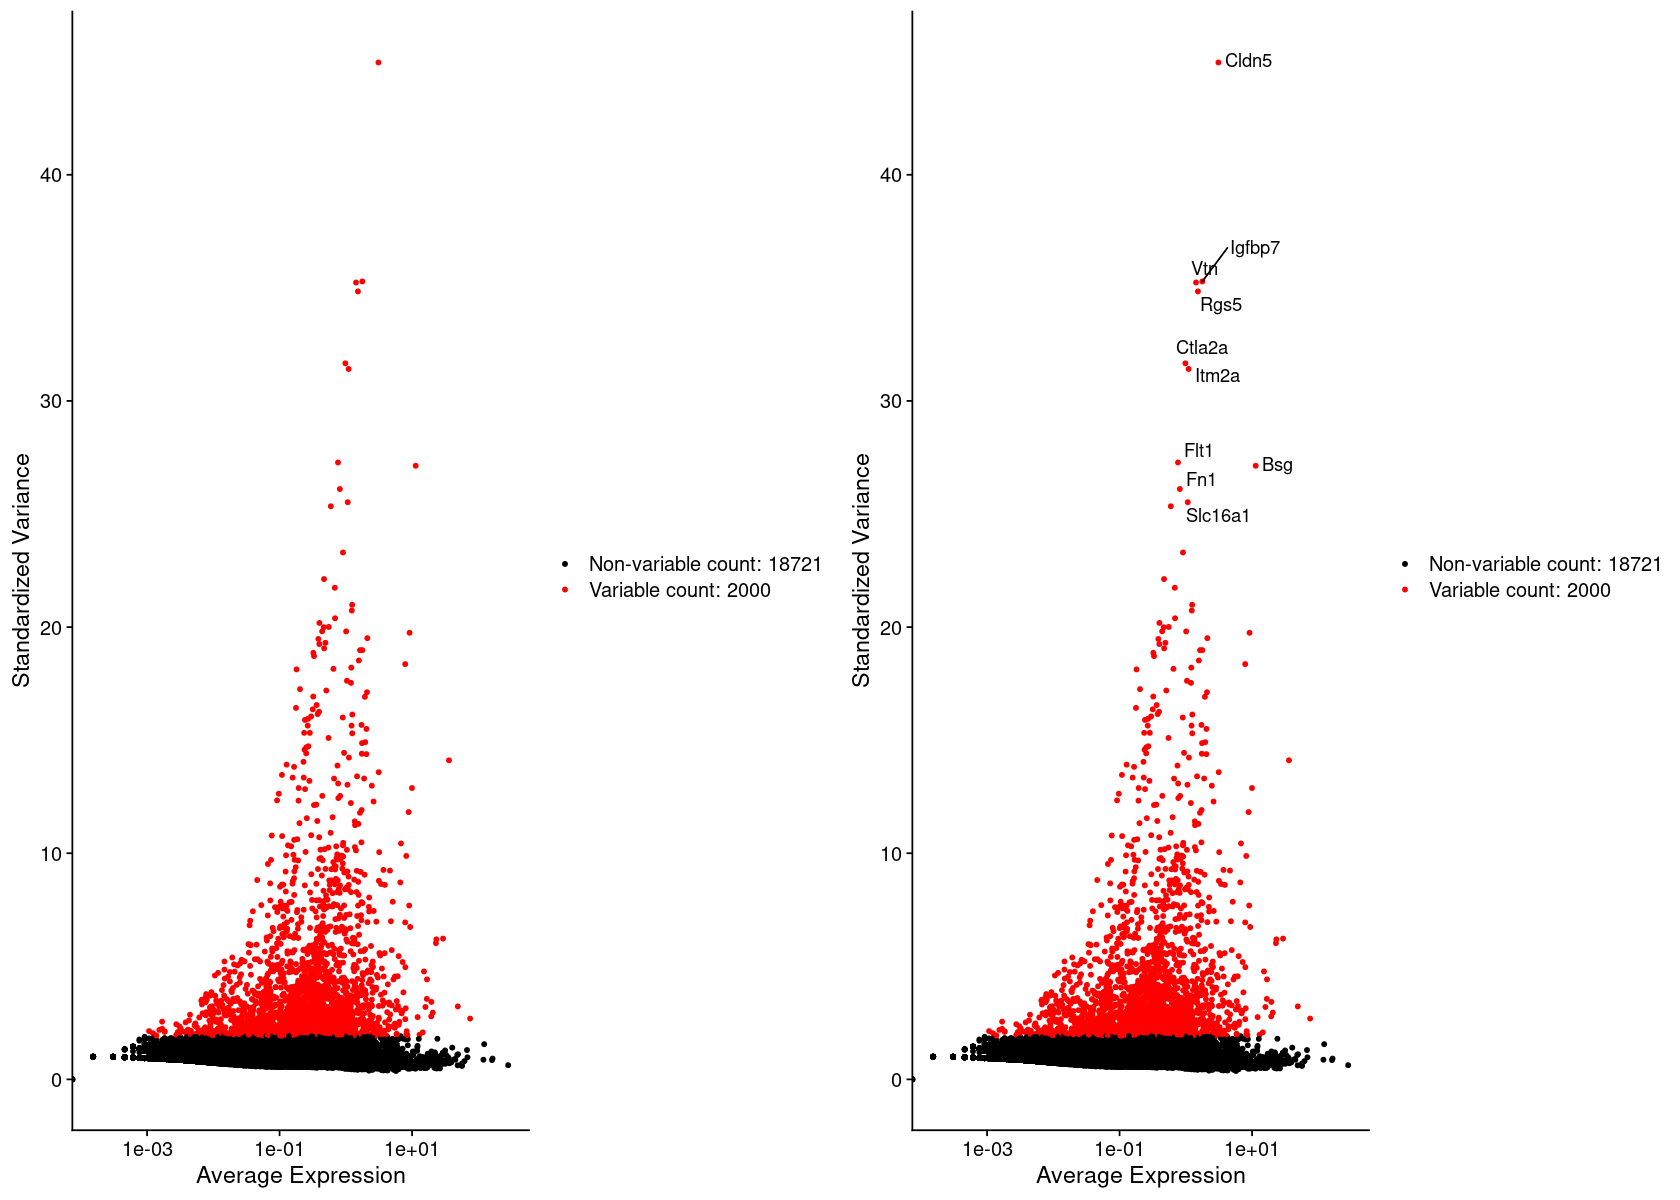

In [7]:
tmp <- NormalizeData(tmp, normalization.method = "LogNormalize", scale.factor = 10000)
tmp <- FindVariableFeatures(tmp, selection.method = "vst", nfeatures = 2000)
top10 <- head(VariableFeatures(tmp), 10)

plot1 <- VariableFeaturePlot(tmp)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
options(repr.plot.width=14)
CombinePlots(plots = list(plot1, plot2))

Regressing out percent.mt

Centering and scaling data matrix

PC_ 1 
Positive:  Tmsb4x, Hmgn2, Rab3a, Fyn, Meg3, Olfm1, Bcl11b, Lmnb1, Snap25, Gap43 
	   Insm1, Tubb2a, Ccnd2, Hes6, Grin2b, Mef2c, H1fx, Celf5, Foxp2, Tmpo 
	   Ly6h, Slc6a6, Mafb, Anp32e, St18, Arpp21, Ube2s, Nasp, St8sia3, Ndrg4 
Negative:  Rsph1, Dynlrb2, Meig1, Dnah12, 1700016K19Rik, Cfap54, Tppp3, Efcab10, Cfap206, Gm867 
	   Cfap126, Ccdc153, Tm4sf1, 1700007K13Rik, Dnali1, Pifo, Foxj1, Ccdc113, Spef2, 1700012B09Rik 
	   Ak7, 1700001C02Rik, Gm19935, Rsph4a, Fam183b, Dnah6, Spag17, Odf3b, Rarres2, Cfap52 
PC_ 2 
Positive:  Nnat, Hsp90aa1, Slc38a1, Meig1, 1700012B09Rik, 1700016K19Rik, Rsph1, Ccdc153, Cfap206, Efcab10 
	   Dnah12, Hdc, Fam183b, Ak7, 1700001C02Rik, 1110017D15Rik, Odf3b, Lrrc71, Ppp1r32, 4833427G06Rik 
	   Nudt4, Lrrc23, Ccdc113, Dnali1, 6820408C15Rik, Spag17, BC051019, 1700007K13Rik, 1700001L19Rik, 1700007G11Rik 
Negative:  Eng, Cldn5, Foxq1, Flt1, Slc22a8, Esam, Cd34, Igfbp7, Adgrf5, Adgrl4 
	   Cd93, 

PC_ 1 
Positive:  Tmsb4x, Hmgn2, Rab3a, Fyn, Meg3 
Negative:  Rsph1, Dynlrb2, Meig1, Dnah12, 1700016K19Rik 
PC_ 2 
Positive:  Nnat, Hsp90aa1, Slc38a1, Meig1, 1700012B09Rik 
Negative:  Eng, Cldn5, Foxq1, Flt1, Slc22a8 
PC_ 3 
Positive:  Caln1, Grm5, Gpr88, Tmem158, Snca 
Negative:  H2afv, Ccnd2, Hmgn2, Hmgb2, Tmpo 
PC_ 4 
Positive:  Aldoc, Cldn10, Slc1a2, S1pr1, Plpp3 
Negative:  Top2a, Ube2s, H2afz, Cdca8, Cdk1 
PC_ 5 
Positive:  Nnat, Cald1, Meg3, Olfm1, Rhob 
Negative:  Mki67, Ccna2, Pbk, Birc5, Cdca3 


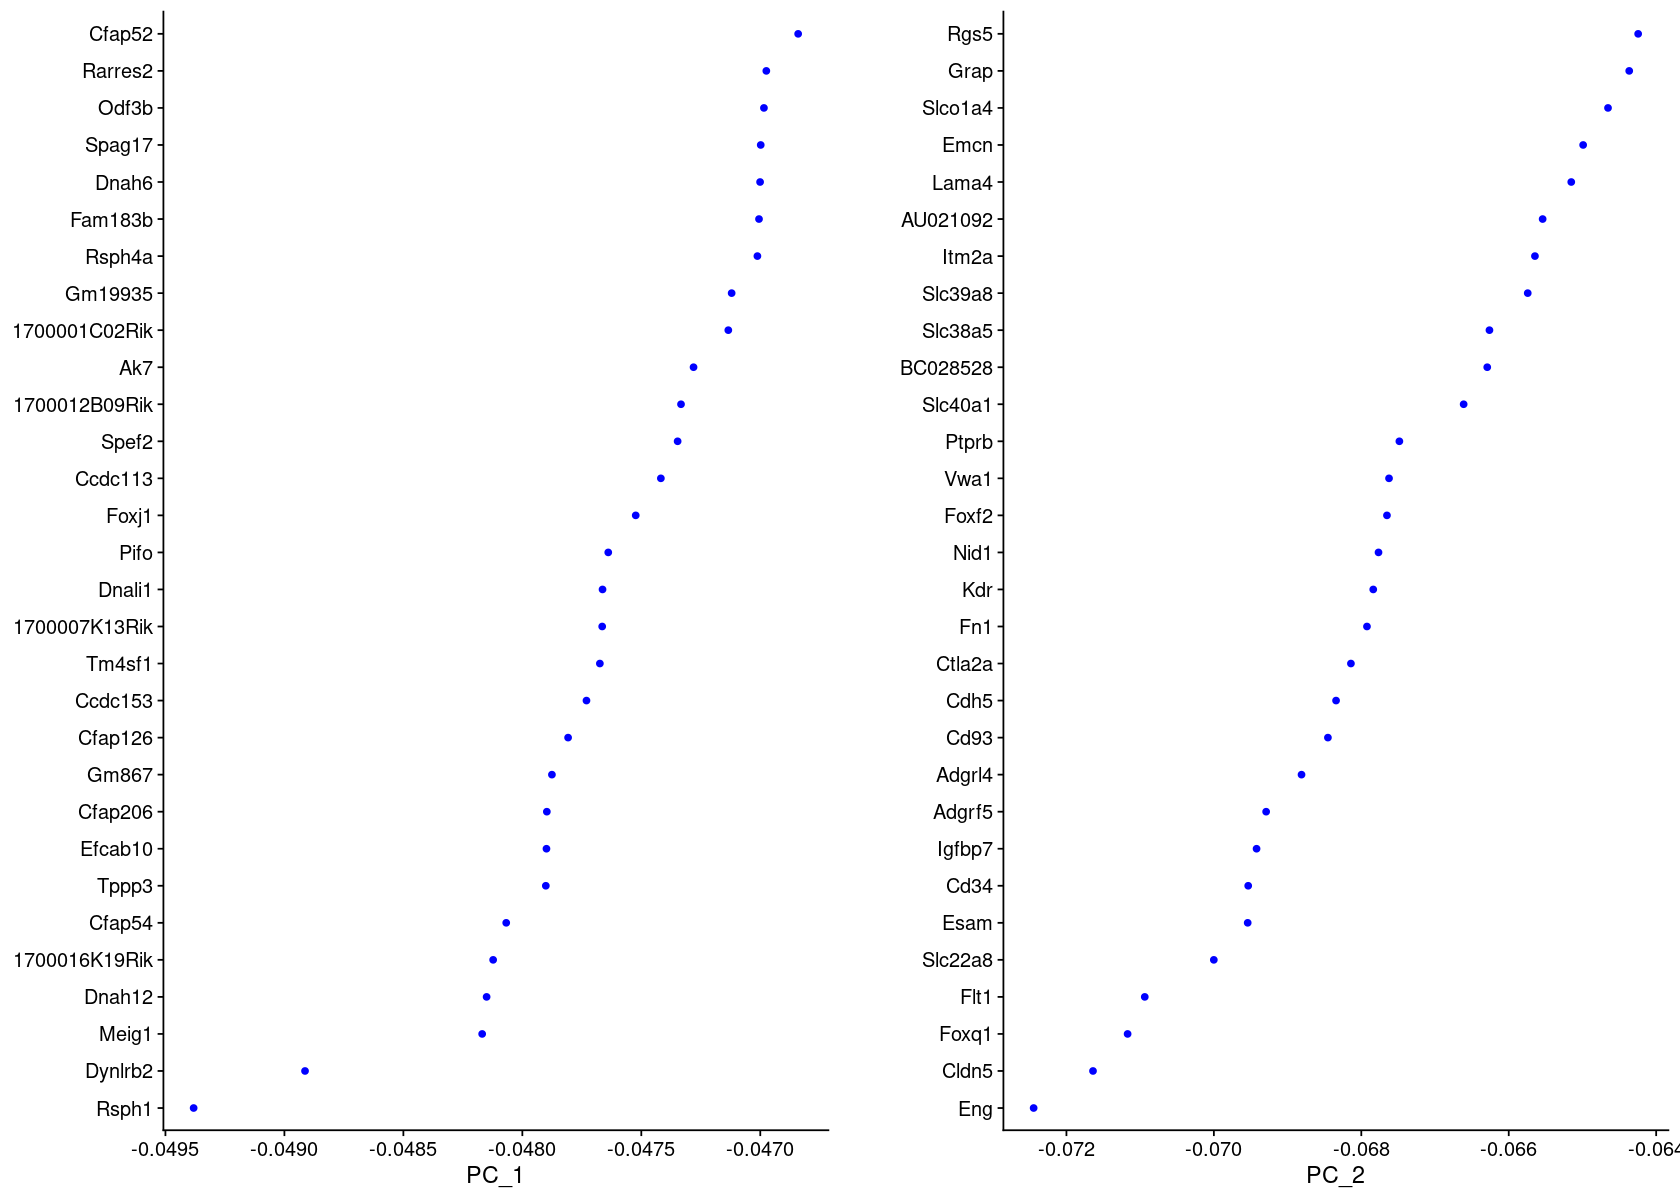

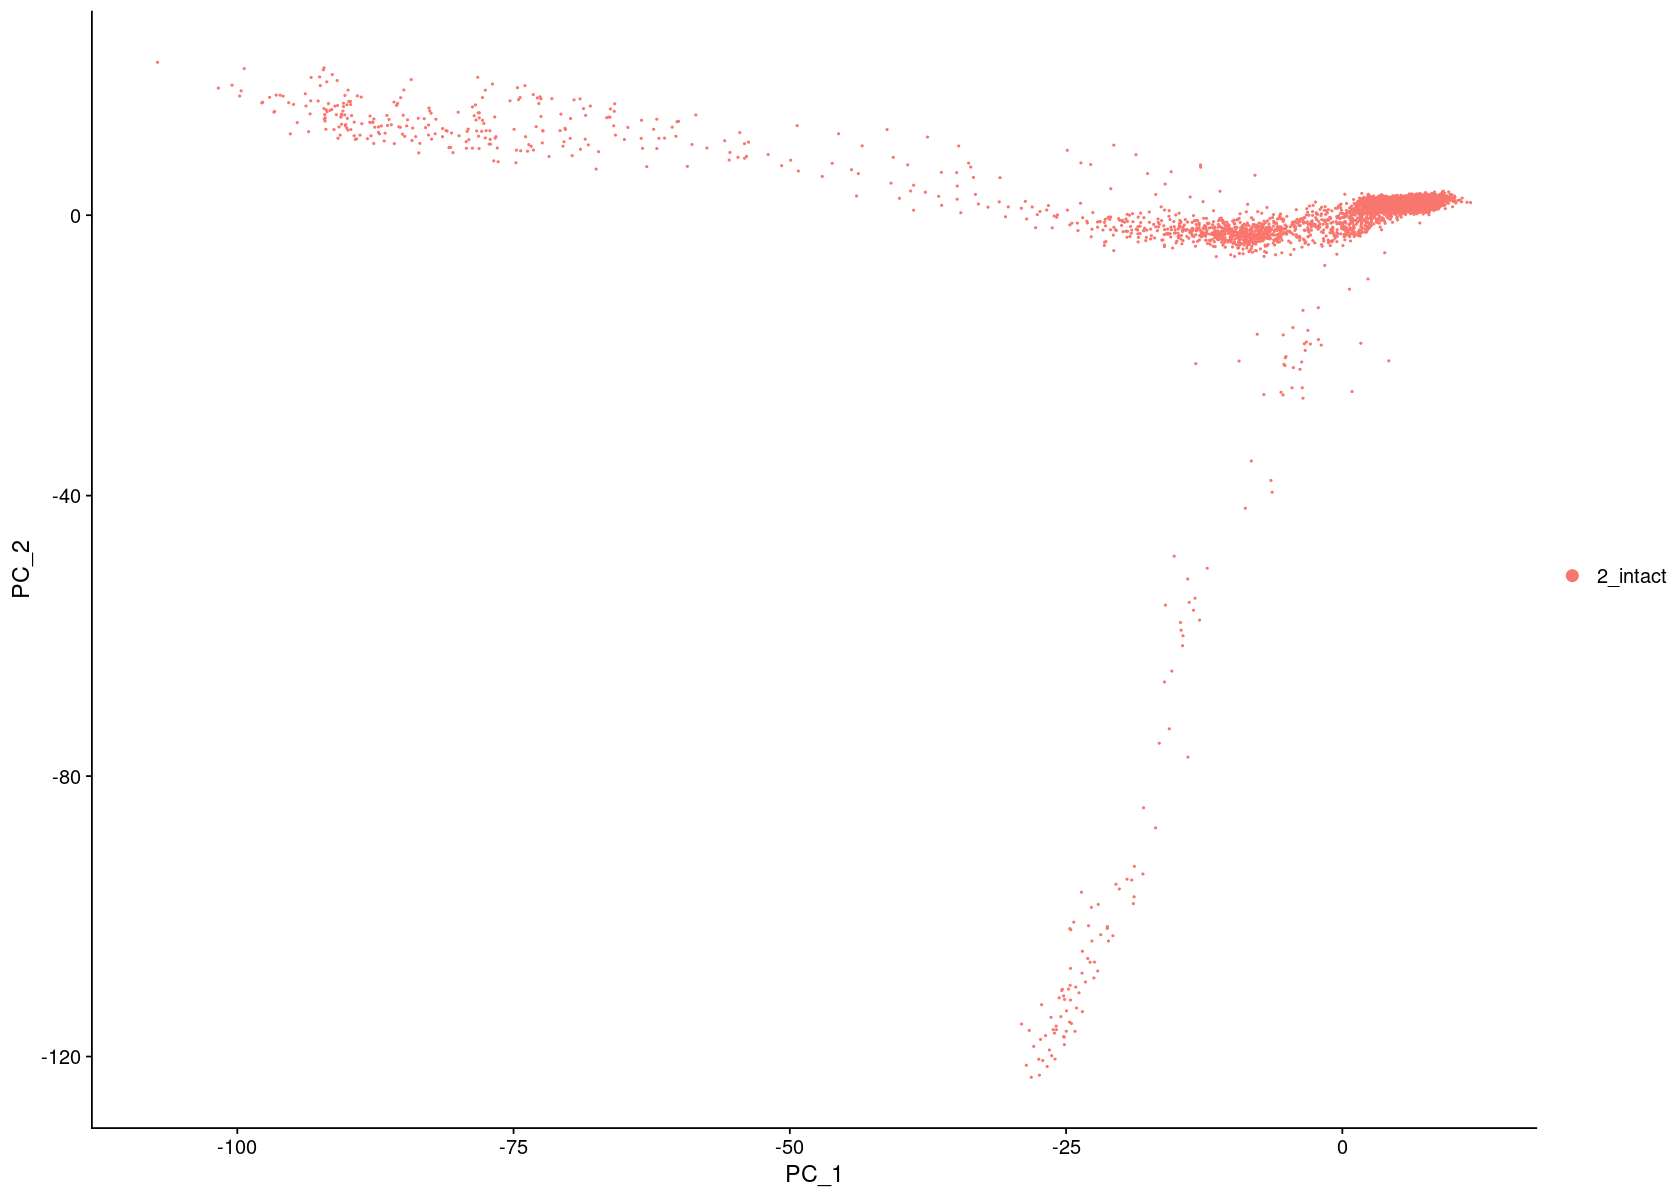

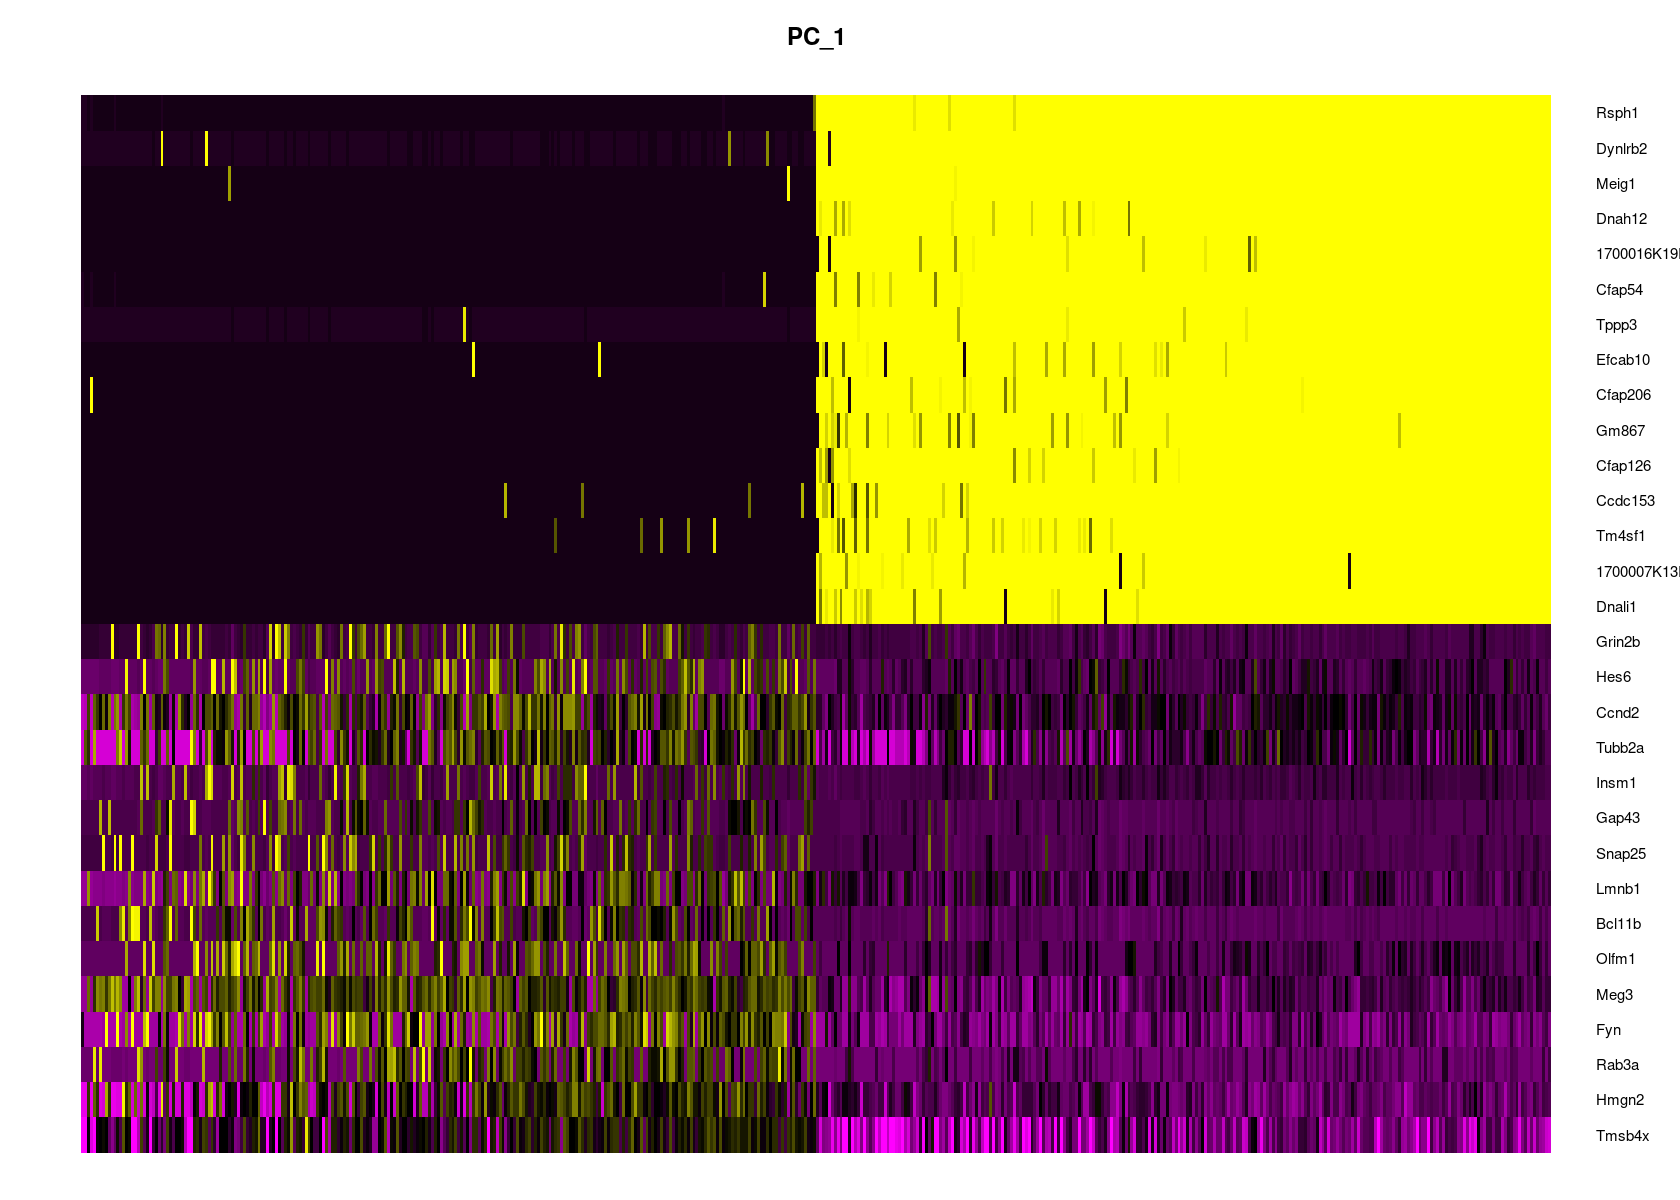

In [8]:
all.genes <- rownames(tmp)
tmp <- ScaleData(tmp, vars.to.regress="percent.mt")
#tmp <- ScaleData(tmp, features=all.genes)

tmp <- RunPCA(tmp, features = VariableFeatures(object = tmp))
print(tmp[["pca"]], dims=1:5, nfeatures=5)

VizDimLoadings(tmp, dims=1:2, reduction="pca")

DimPlot(tmp, reduction="pca")

DimHeatmap(tmp, dims=1, cells=500, balanced=TRUE)

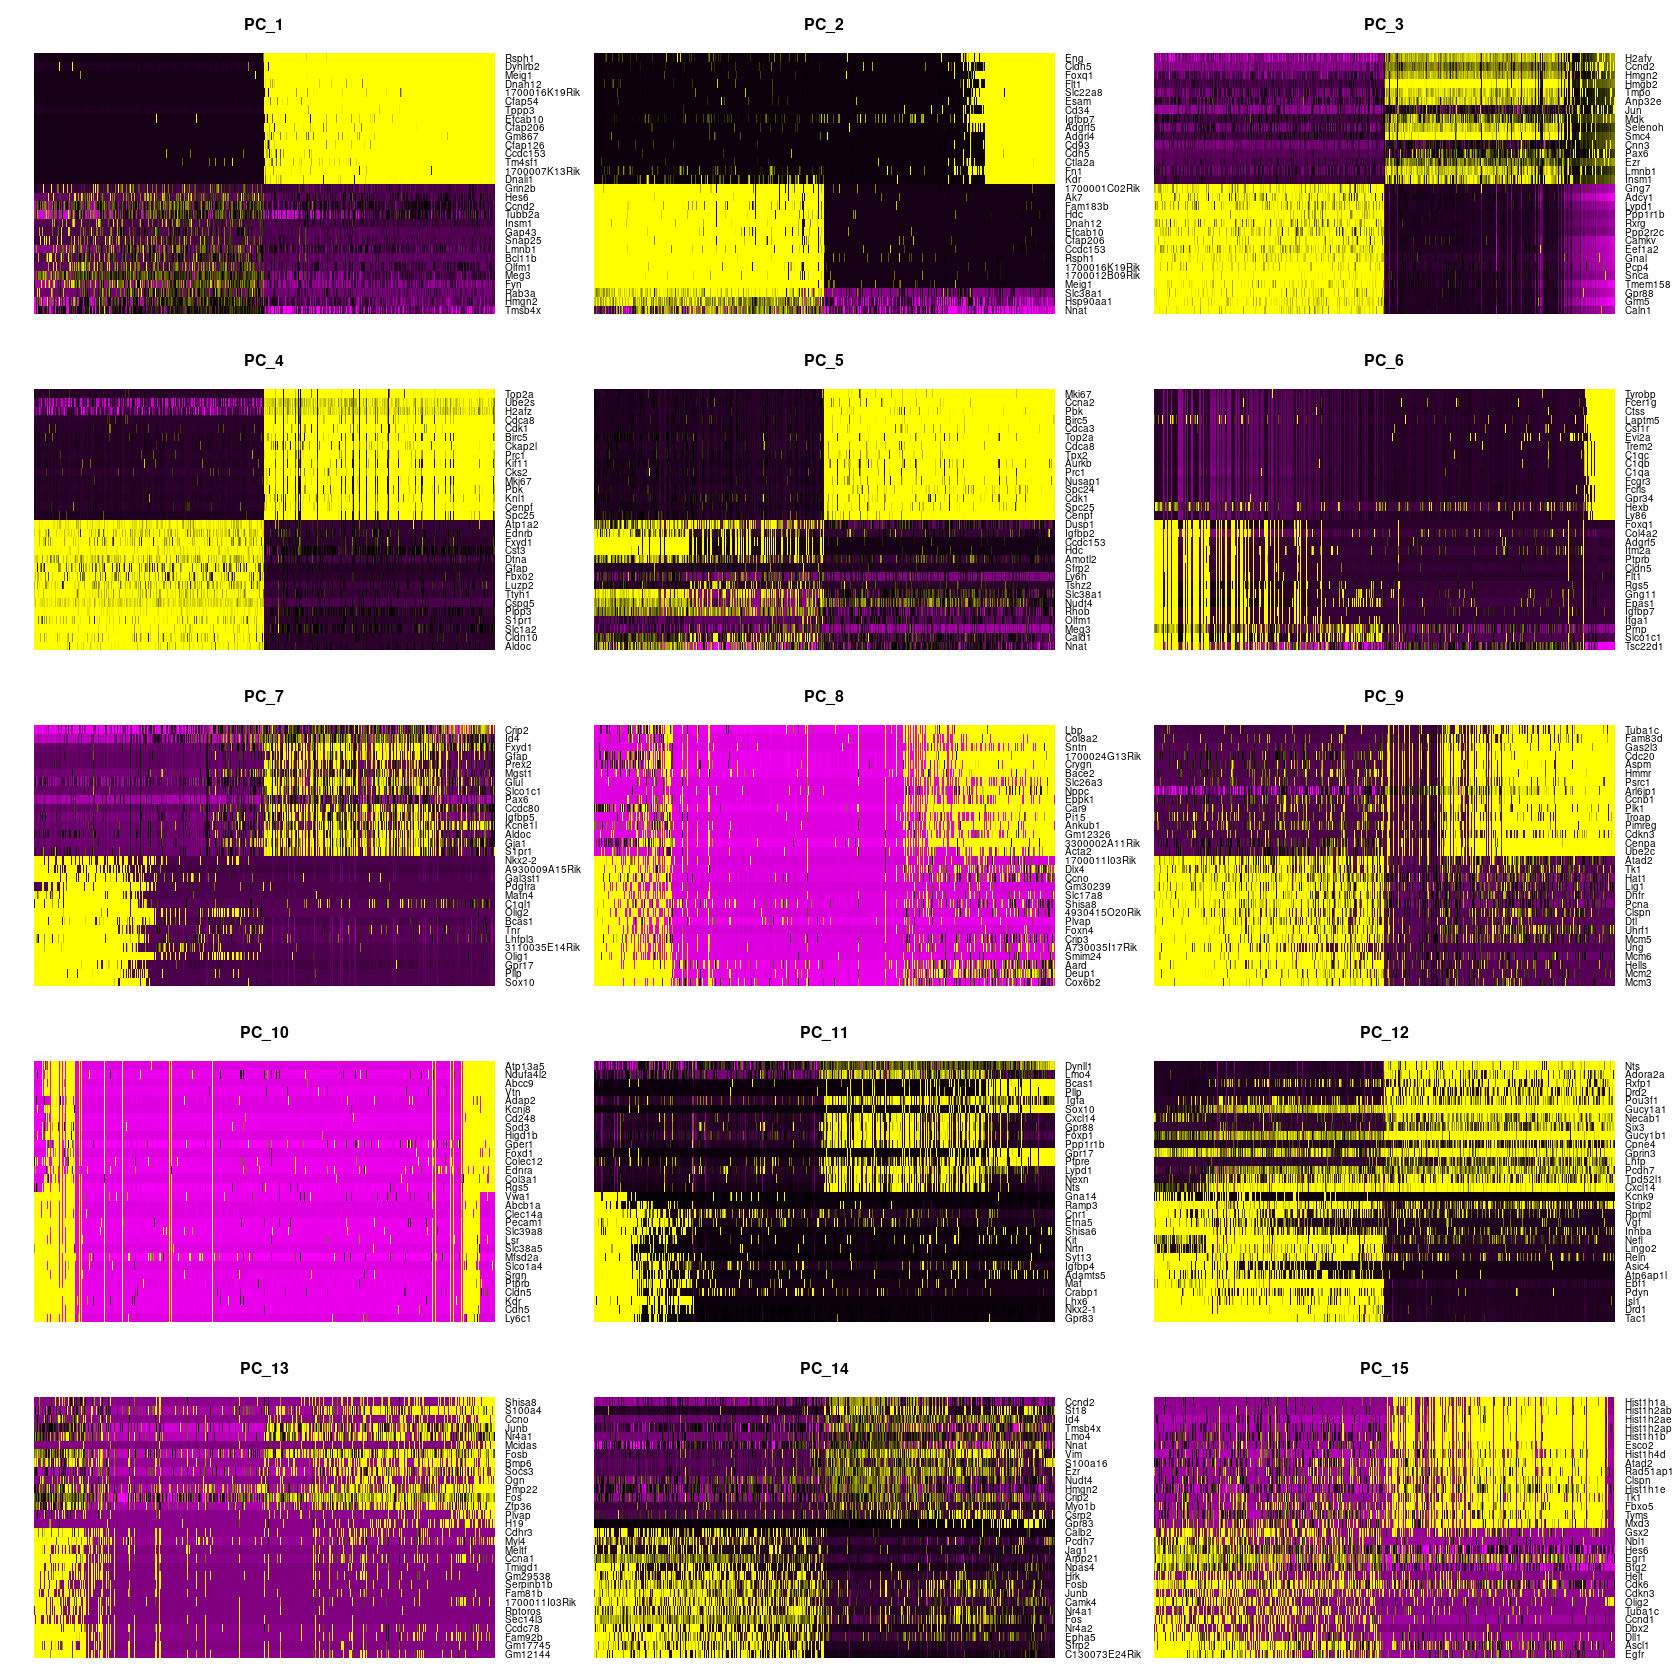

In [9]:
options(repr.plot.width=14, repr.plot.height=14)
DimHeatmap(tmp, dims=1:15, cells=500, balanced=TRUE)

Warning message:
“Removed 28053 rows containing missing values (geom_point).”


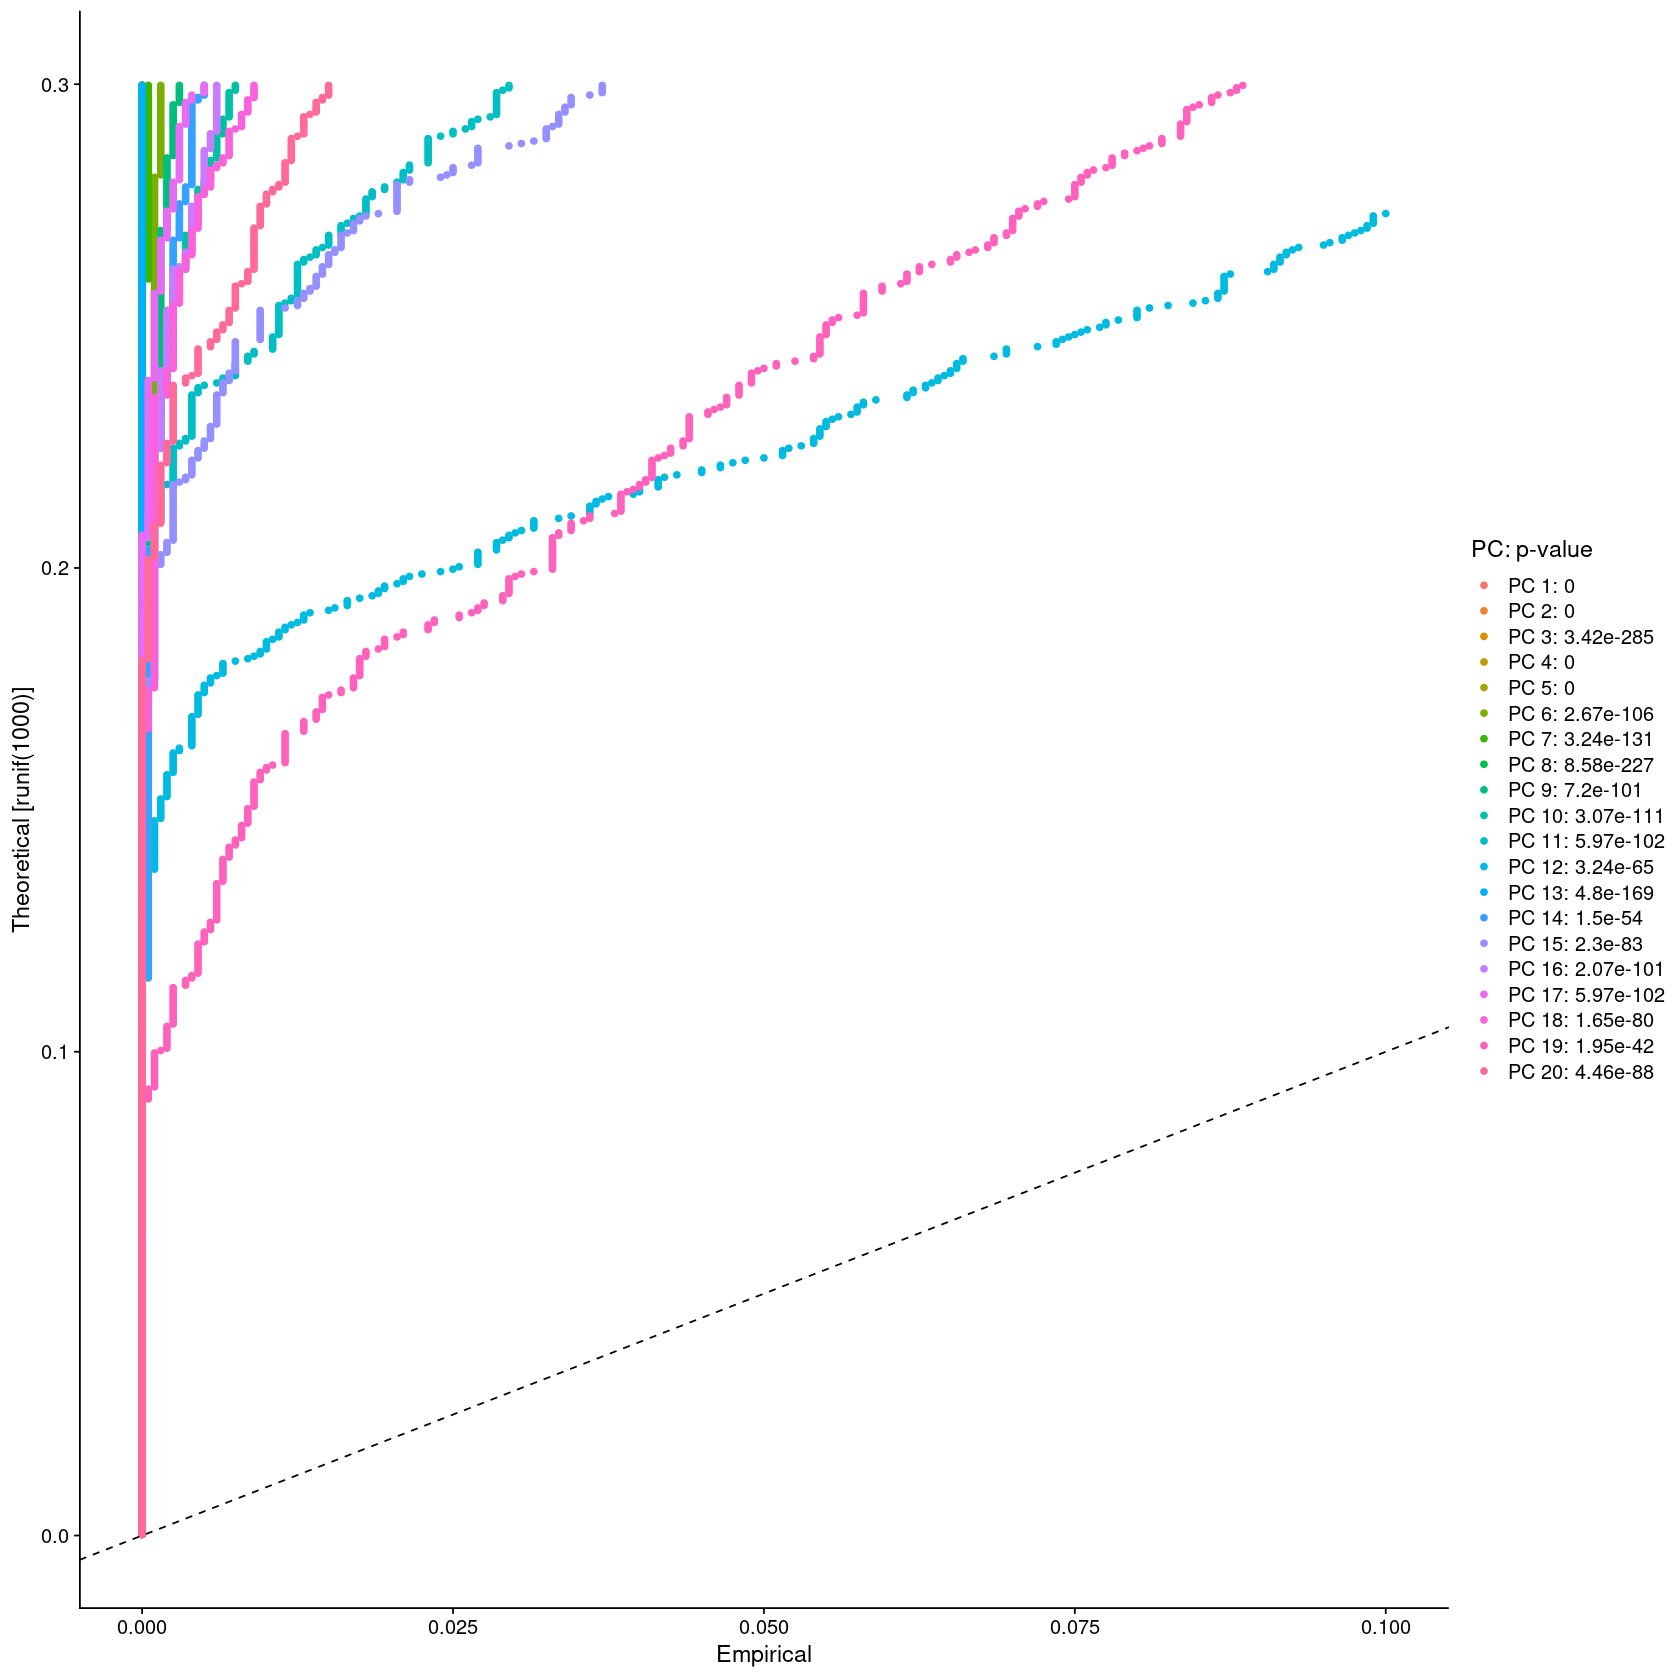

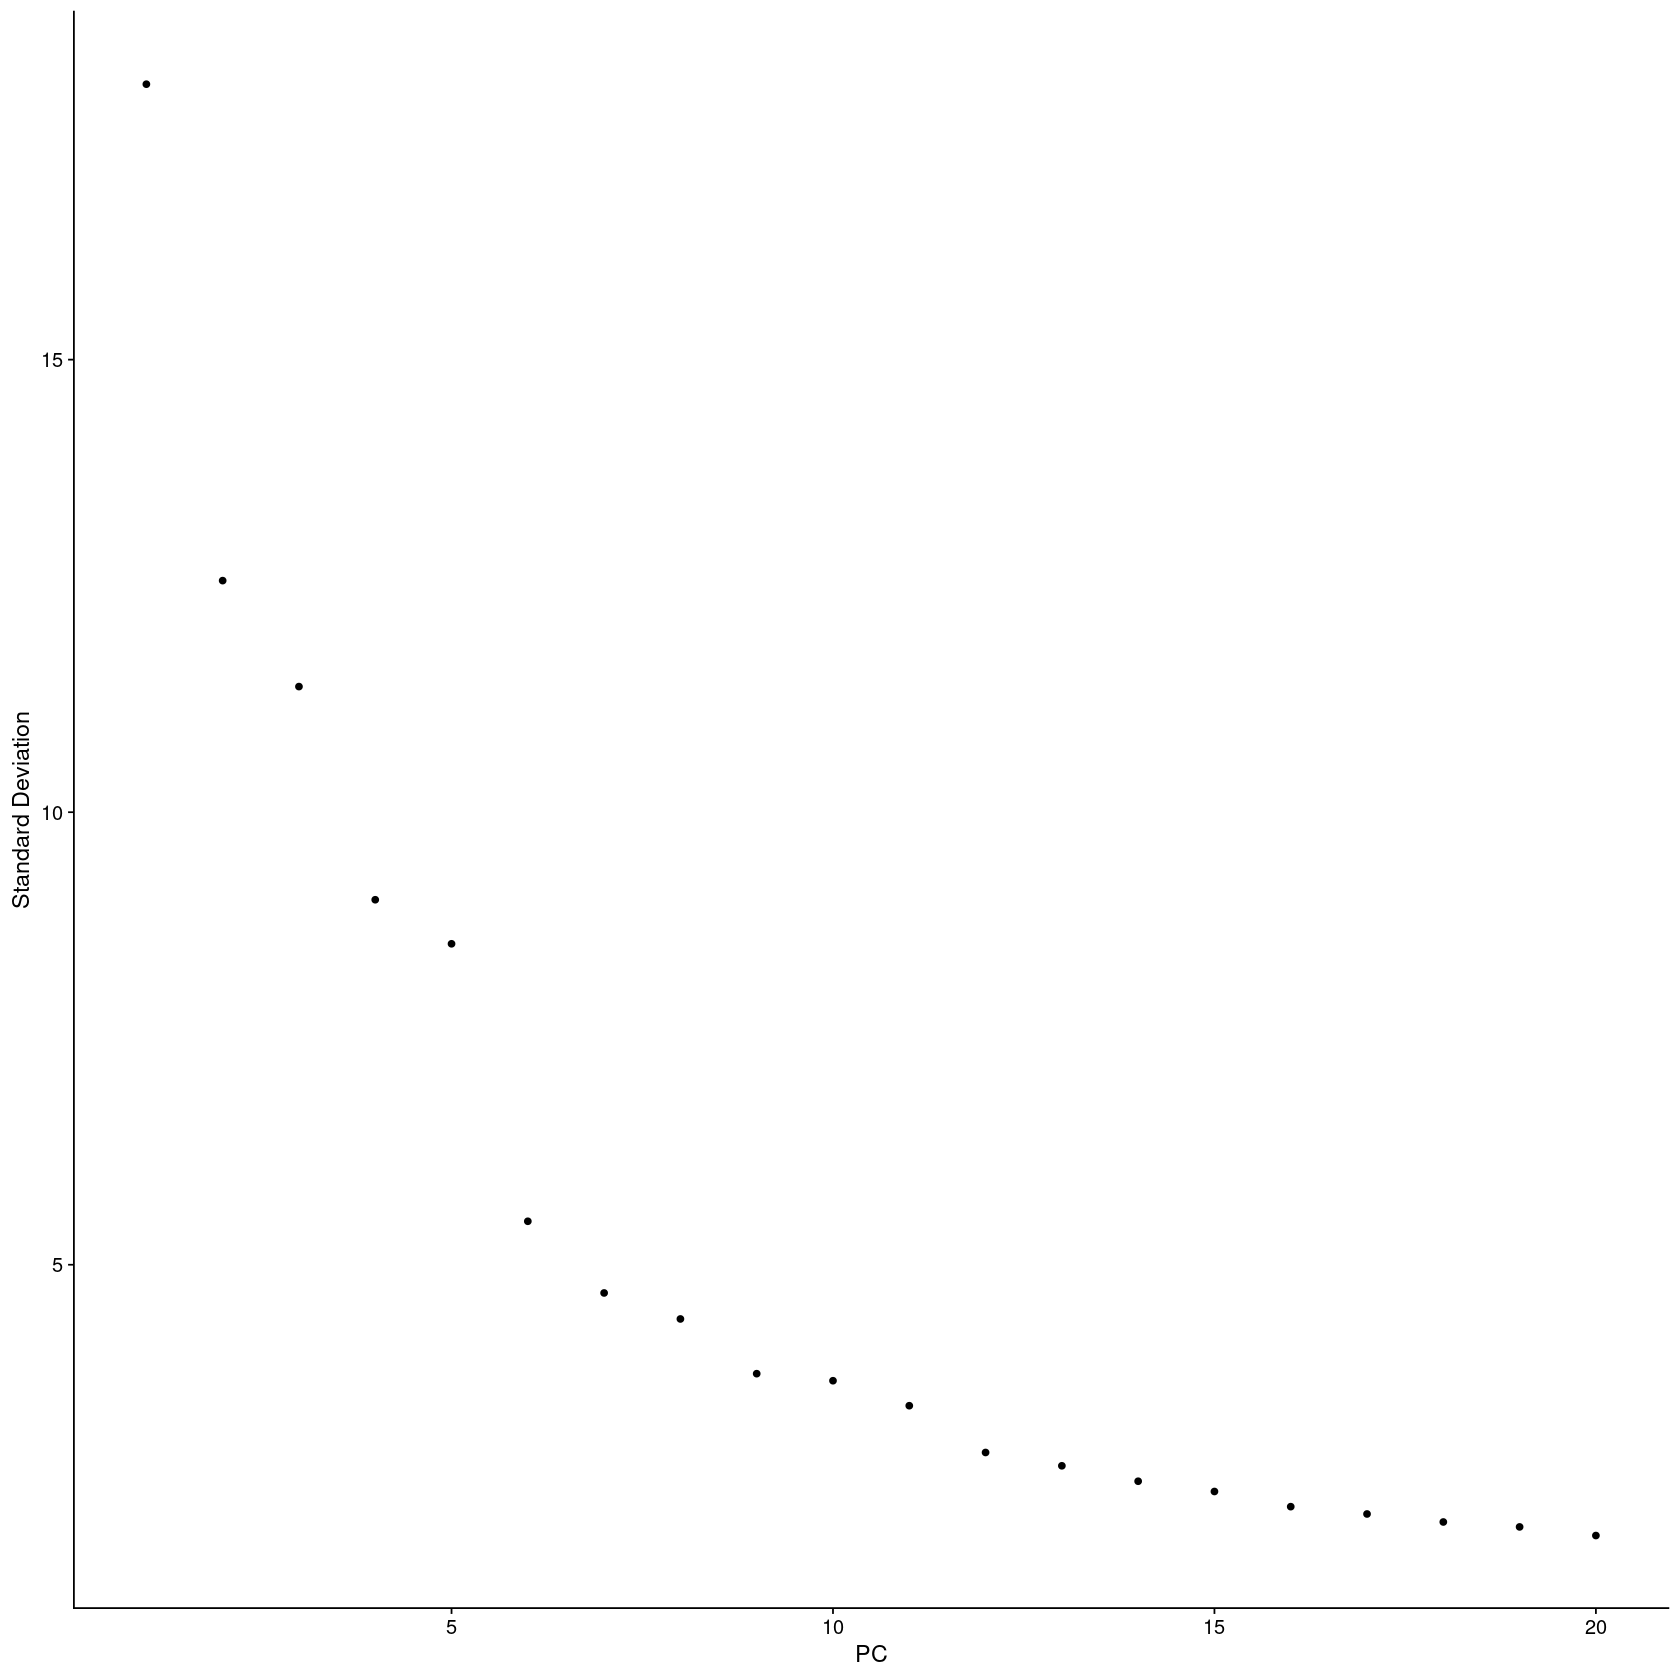

In [10]:
tmp <- JackStraw(tmp, num.replicate=100)
tmp <- ScoreJackStraw(tmp, dims=1:20)

JackStrawPlot(tmp, dims=1:20)

ElbowPlot(tmp)

In [11]:
arg10 <- 20 #maximum PC

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6523
Number of edges: 228334

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8731
Number of communities: 19
Elapsed time: 7 seconds


AAACCCAAGCCGCACT AAACCCACACGCGGTT AAACCCAGTAGTGATA AAACCCATCCCTATTA 
               1                8                9                9 
AAACCCATCGTGTGAT 
              12 
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18

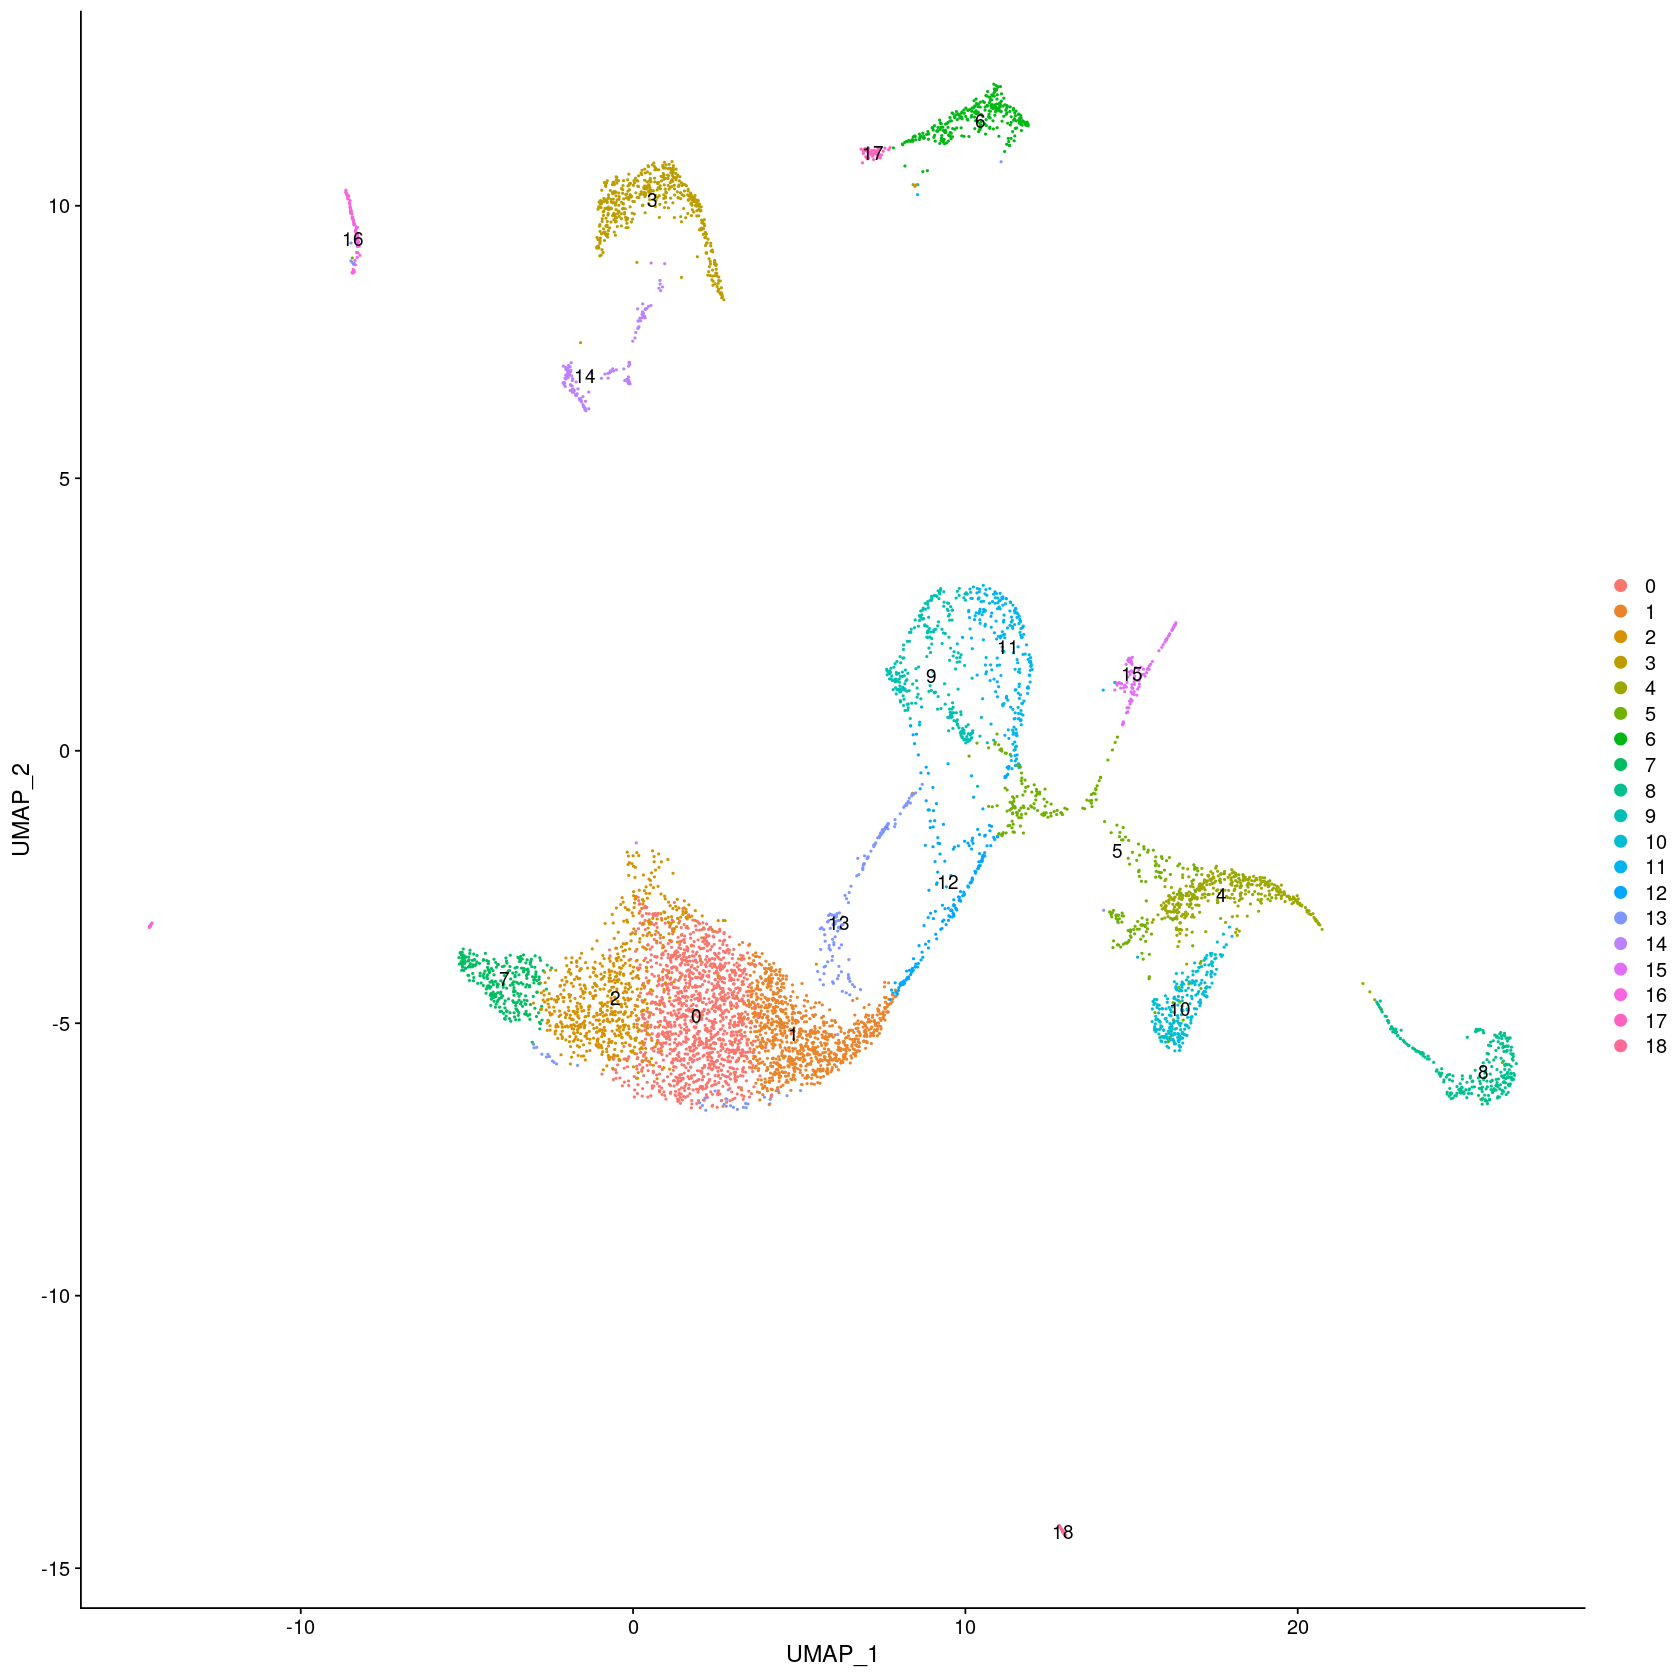

In [12]:
tmp <- FindNeighbors(tmp, dims=1:arg10)
tmp <- FindClusters(tmp, resolution=0.8)

head(Idents(tmp), 5)

tmp <- RunUMAP(tmp, dims=1:arg10, umap.method = 'umap-learn', metric='correlation')
DimPlot(tmp, reduction="umap", label=TRUE)

In [13]:
sample.markers <- FindAllMarkers(tmp, min.pct = 0.25, logfc.threshold = 0.25)
sample.markers %>% group_by(cluster) %>% top_n(n = 2, wt = avg_logFC)
markers10 <- sample.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18



p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0.000000e+00,0.8709158,0.986,0.820,0.000000e+00,0,Zfp704
0.000000e+00,0.7977211,0.990,0.951,0.000000e+00,0,Btg1
0.000000e+00,1.0503054,1.000,0.936,0.000000e+00,1,Pfn2
3.127594e-273,1.0727975,0.998,0.756,6.480688e-269,1,Ccnd2
6.307692e-162,0.8056155,0.536,0.143,1.307017e-157,2,Sfrp2
3.427360e-152,0.8849695,0.923,0.666,7.101833e-148,2,Tshz1
0.000000e+00,2.2168357,1.000,0.411,0.000000e+00,3,Foxp1
0.000000e+00,2.1839076,0.998,0.150,0.000000e+00,3,Gucy1a1
1.735759e-297,2.5397026,1.000,0.288,3.596666e-293,4,Slc1a2


In [14]:
write.table(sample.markers, file=paste(arg03,'_all_markers.tsv',sep=''), sep='\t', na='', row.names=T, col.names=NA, quote=F)
write.table(markers10, file=paste(arg03,'_top10_markers.tsv',sep=''), sep='\t', na='', row.names=T, col.names=NA, quote=F)

In [15]:
saveRDS(tmp, file=arg04)

In [16]:
#sample <- readRDS(file=args04)

In [17]:
#From CellMarker
#cancer_marker <- list('CD44', 'CD22', 'SOX2', 'EPCAM')
#, 'ALDH1', 'CD133', 'ESA'
#for (i in cancer_marker){
#   p1 <- FeaturePlot(sample, features = i)
#    p2 <- VlnPlot(sample, features = i)
#    print(CombinePlots(plots = list(p1, p2)))
#}

In [18]:
#From Dr.Nagasawa slide
#cancer_marker <- list('VIM', 'CD22', 'SOX2', 'EPCAM')
#, 'ALDH1', 'CD133', 'ESA'
#for (i in cancer_marker){
#    p1 <- FeaturePlot(sample, features = i)
#    p2 <- VlnPlot(sample, features = i)
#    print(CombinePlots(plots = list(p1, p2)))
#}